# Intorduction to Pandas - Pan(el)-da(ta)-s

#### Laszlo Tetenyi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests, zipfile, io # So that we can download and unzip files

## Survey of Consumer Finances (SCF) 2013

Load and explore data from the SCF website - note that this data cannot be loaded by 2007- Excel due to its size

In [2]:
r = requests.get('http://www.federalreserve.gov/econresdata/scf/files/scfp2013excel.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
f = z.open('SCFP2013.xlsx')
table = pd.read_excel(f, sheetname='SCFP2013')

Lets have a quick look at the table

In [3]:
table.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NW10CAT,INC10CAT,NINC10CAT
0,1,11,3100.802441,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
1,1,12,3090.352195,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
2,1,13,3094.100275,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
3,1,14,3098.507516,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
4,1,15,3104.670102,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4


We can select particular rows of the table using standard Python array slicing notation

In [4]:
table[0:5]

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NW10CAT,INC10CAT,NINC10CAT
0,1,11,3100.802441,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
1,1,12,3090.352195,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
2,1,13,3094.100275,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
3,1,14,3098.507516,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
4,1,15,3104.670102,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4


table is a DataFrame - a multi-dimensional equivalent of Series (another Pandas object), as it has multiple columns, so you can think of it as a matrix, where columns can be accessed by their 'names'. In fact, many operations can be performed on them (coming from numpy):

In [5]:
table.max().max()

1324540600.0

But they know more than that - they have several built-in statistics :

In [6]:
table.describe()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NW10CAT,INC10CAT,NINC10CAT
count,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,...,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000,30075.000000
mean,3013.273317,30135.733167,4074.150302,1.236575,51.753283,3.232253,13.963591,3.025403,1.373400,0.840067,...,539.636908,4231.891604,2.996143,3.574763,3.572835,3.597905,1.832086,6.229061,6.250208,6.291837
std,1739.205187,17392.051924,2199.735338,0.424986,16.170621,1.532090,2.699456,1.048733,0.483715,1.174573,...,12572.614911,124661.121441,1.493547,1.781943,1.840313,1.776878,0.784993,3.170065,3.096357,3.081563
min,1.000000,11.000000,1.620062,1.000000,18.000000,1.000000,-1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1508.000000,15084.500000,3037.739309,1.000000,39.000000,2.000000,12.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000,4.000000
50%,3013.000000,30133.000000,4303.426803,1.000000,52.000000,3.000000,14.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,3.000000,4.000000,4.000000,4.000000,2.000000,7.000000,7.000000,7.000000
75%,4519.000000,45191.500000,5469.228758,1.000000,63.000000,4.000000,16.000000,4.000000,2.000000,2.000000,...,0.000000,0.000000,5.000000,5.000000,6.000000,5.000000,2.000000,10.000000,9.000000,9.000000
max,6026.000000,60265.000000,10617.366341,2.000000,95.000000,6.000000,17.000000,4.000000,2.000000,8.000000,...,720000.000000,8000000.000000,5.000000,6.000000,6.000000,6.000000,3.000000,10.000000,10.000000,10.000000


As an example try to access normalized income and net-worth variables.

In [7]:
table.dtypes[0:5]
table.dtypes.shape

(324,)

There are way too many variables in there - try to search for the proper column names

In [8]:
[col for col in table.columns if 'NETWOR'  in col]

['NETWORTH']

In [9]:
[col for col in table.columns if 'INC'  in col]

['INCOME',
 'WAGEINC',
 'BUSSEFARMINC',
 'INTDIVINC',
 'KGINC',
 'SSRETINC',
 'TRANSFOTHINC',
 'NORMINC',
 'EQUITINC',
 'DEBT2INC',
 'INCCAT',
 'NINCCAT',
 'NINC2CAT',
 'INC10CAT',
 'NINC10CAT']

In [10]:
income = table['NORMINC']
net_worth = table['NETWORTH']

Get the "mean" (non -weighted) income and minimal net worth

In [11]:
income.mean()

713563.8921620903

In [12]:
net_worth.min()

-227019000.0

That is, there is one person with a net worth of -227 million \$ ! Suppose we do not want our analysis to depend on these extremely low values and we would like to trim our dataframe. As a first step, create a new dataframe that only contains the variables of interest (and the id of each observation)

In [13]:
keep = ['YY1','Y1', 'NORMINC', 'NETWORTH']

In [14]:
data = table[keep]

In [15]:
data.head()

,YY1,Y1,NORMINC,NETWORTH
0,1,11,37537.663108,-400
1,1,12,39566.725979,-400
2,1,13,35508.600237,-400
3,1,14,38552.194543,-400
4,1,15,35508.600237,-400


Rename the columns:

In [16]:
data.columns ='Household', 'Observation' , 'Income', 'Net Worth'

In [17]:
data.head()

,Household,Observation,Income,Net Worth
0,1,11,37537.663108,-400
1,1,12,39566.725979,-400
2,1,13,35508.600237,-400
3,1,14,38552.194543,-400
4,1,15,35508.600237,-400


Try to get a general picture of what would be a "good" trimming value of net worth by plotting an estimated kernel density 

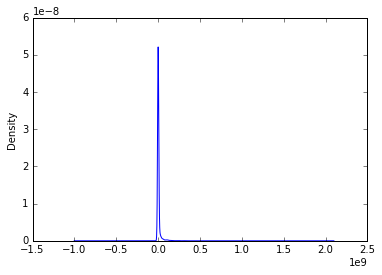

In [18]:
data['Net Worth'].plot(kind='density')
plt.show()

Let's see how many observations we eliminate if we exclude everyone below -1 million \$

In [19]:
data_trimmed = data[data['Net Worth'] > -1000000]

In [20]:
data.shape[0] - data_trimmed.shape[0] 

15

But how many households are in this category?

In [21]:
data[data['Net Worth'] < -1000000]

,Household,Observation,Income,Net Worth
2770,555,5551,56813.760380,-1692510
2771,555,5552,54784.697509,-1760510
2772,555,5553,53770.166074,-1673500
2773,555,5554,49712.040332,-1464610
2774,555,5555,49712.040332,-1962990
14230,2852,28521,0.000000,-215289000
14231,2852,28522,0.000000,-220820200
14232,2852,28523,0.000000,-227019000
14233,2852,28524,0.000000,-226697000
14234,2852,28525,0.000000,-216780000


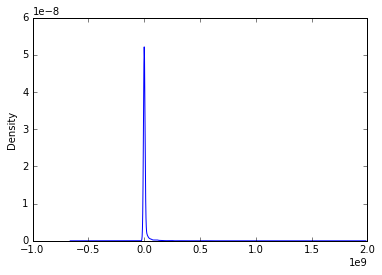

In [22]:
data_trimmed['Net Worth'].plot(kind='density')
plt.show()

## Pivoting

Note that the data has a nice panel structure which we so far did not exploit - each household has multiple observations. Lets use pivoting so that our dataframe reflects that. First get the index of our dataframe: 

In [23]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            30065, 30066, 30067, 30068, 30069, 30070, 30071, 30072, 30073,
            30074],
           dtype='int64', length=30075)

We simply have the index of each observation. As a first step, replace these indeces by the household identifier and group income levels in each observation:

In [24]:
new_observations = data.loc[:,'Observation'] - 10 * data.loc[:,'Household']
data.loc[:,'Observation'] = new_observations
data[0:10]
# Normally, you should not do this - instead use assign

D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Household,Observation,Income,Net Worth
0,1,1,37537.663108,-400
1,1,2,39566.725979,-400
2,1,3,35508.600237,-400
3,1,4,38552.194543,-400
4,1,5,35508.600237,-400
5,2,1,22319.691578,-8700
6,2,2,22319.691578,-8600
7,2,3,22319.691578,-8700
8,2,4,22319.691578,-8600
9,2,5,22319.691578,-8600


In [25]:
# Reload the data
data = table[keep]
data.columns ='Household', 'Observation' , 'Income', 'Net Worth'

In [26]:
data = data.assign(Observations = (data['Observation'] - 10.0 * data['Household']).astype(int))
del data['Observation'] # delete the old column
data = data.rename(columns = {'Observations':'Observation'}) # rename the column
data = data[['Household', 'Observation' , 'Income', 'Net Worth']] # reinsert the column
data.head()

,Household,Observation,Income,Net Worth
0,1,1,37537.663108,-400
1,1,2,39566.725979,-400
2,1,3,35508.600237,-400
3,1,4,38552.194543,-400
4,1,5,35508.600237,-400


In [27]:
p = data.pivot(index = 'Household' , columns = 'Observation' , values = 'Income' )

In [28]:
p.head()

Observation,1,2,3,4,5
Household,,,,,
1,37537.663108,39566.725979,35508.600237,38552.194543,35508.600237
2,22319.691578,22319.691578,22319.691578,22319.691578,22319.691578
3,52755.634638,52755.634638,52755.634638,52755.634638,52755.634638
4,125801.897980,125801.897980,125801.897980,125801.897980,125801.897980
5,99424.080664,107540.332150,108554.863580,108554.863580,92322.360617


If instead we are interested in both income and net worth grouped by observations then:

In [29]:
p = data.pivot(index='Household', columns='Observation')

In [30]:
p.head()

Income                                               \
Observation              1              2              3              4   
Household                                                                 
1             37537.663108   39566.725979   35508.600237   38552.194543   
2             22319.691578   22319.691578   22319.691578   22319.691578   
3             52755.634638   52755.634638   52755.634638   52755.634638   
4            125801.897980  125801.897980  125801.897980  125801.897980   
5             99424.080664  107540.332150  108554.863580  108554.863580   

                           Net Worth                                      
Observation              5         1        2        3        4        5  
Household                                                                 
1             35508.600237      -400     -400     -400     -400     -400  
2             22319.691578     -8700    -8600    -8700    -8600    -8600  
3             52755.634638      -500     -600     -500     -500     -500  
4            125801.897980   2111950  2169750  2149850  2216950  2289850  
5             92322.360617    676600   675300   677100   677400   677300

Use stacking to transform the data into a panel structure we are familiar with (and unstacking to go back to cross-section):

In [31]:
panel_data = p.stack()

In [32]:
panel_data.head()

Income  Net Worth
Household Observation                         
1         1            37537.663108       -400
          2            39566.725979       -400
          3            35508.600237       -400
          4            38552.194543       -400
          5            35508.600237       -400

Using the panel structure it is even easier to see the number of households that had fewer
than -1 million \$ net worth

In [33]:
panel_data[panel_data['Net Worth'] < -1000000]

Income  Net Worth
Household Observation                         
555       1            56813.760380   -1692510
          2            54784.697509   -1760510
          3            53770.166074   -1673500
          4            49712.040332   -1464610
          5            49712.040332   -1962990
2852      1                0.000000 -215289000
          2                0.000000 -220820200
          3                0.000000 -227019000
          4                0.000000 -226697000
          5                0.000000 -216780000
3764      1                0.000000   -2037500
          2                0.000000   -1390100
          3                0.000000   -2130900
          4                0.000000   -1293000
          5                0.000000   -1521200

Pandas even have their own data-structure for panel data - for it, we need to create dataframes as inputs

In [34]:
p = data.pivot(index='Observation', columns='Household')

In [35]:
pdata = {'Observation 1' : pd.DataFrame(p.ix[1,:]),
        'Observation 2' : pd.DataFrame(p.ix[2,:]),
        'Observation 3' : pd.DataFrame(p.ix[3,:]),
        'Observation 4' : pd.DataFrame(p.ix[4,:]),
        'Observation 5' : pd.DataFrame(p.ix[5,:])}
pdata = pd.Panel(pdata)

In [36]:
pdata

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 12030 (major_axis) x 5 (minor_axis)
Items axis: Observation 1 to Observation 5
Major_axis axis: (Income, 1) to (Net Worth, 6026)
Minor_axis axis: 1 to 5

but this is not as useful - unfortunately the panel part of the package has been neglected. Very few functions are available. Now as a last exercise, save our dataFrame to a csv file

In [39]:
data.to_excel('SCF_2013_inc_netw.xlsx')